# Importing the libraries
In this part, we are importing the libraries we need.

In [1]:
# Importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import glob
import datetime
import calendar
import csv

# Spark imports
from pyspark.rdd import RDD
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc
from pyspark.sql.functions import col, asc, desc, split

# used to check if the array has a value
from pyspark.sql.functions import array_contains

# used for the encoding of categories
from sklearn.preprocessing import MultiLabelBinarizer

# Spark 
In this project, we are using apache spark as well as Pandas.

In [2]:
# Initialize a spark session.
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
    return spark

In [3]:
spark = init_spark() # Initializate spark

# Buisiness dataset 
The first dataset is buisiness dataset. We are importing the dataset to work with the features and extract user and profile items.

In [4]:
df_business = pd.read_json('data\yelp_academic_dataset_business.json',lines=True)
df_business  # Printing the df_business file

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2",{'ByAppointmentOnly': 'True'},Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,None,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,{'BusinessAcceptsCreditCards': 'True'},mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",0,32.223236,-110.880452,Target,85711,22,3.5,AZ
3,935 Race St,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
4,101 Walnut St,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,"{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",1,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13,4.5,PA
5,615 S Main St,"{'BusinessParking': 'None', 'BusinessAcceptsCr...",CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Ashland City,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1,36.269593,-87.058943,Sonic Drive-In,37015,6,2.0,TN
6,"8522 Eager Road, Dierbergs Brentwood Point","{'BusinessAcceptsCreditCards': 'True', 'Restau...",n_0UpQx1hsNbnPUSlodU8w,"Sporting Goods, Fashion, Shoe Stores, Shopping...",Brentwood,"{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",1,38.627695,-90.340465,Famous Footwear,63144,13,2.5,MO
7,400 Pasadena Ave S,None,qkRM_2X51Yqxk3btlwAQIg,"Synagogues, Religious Organizations",St. Petersburg,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",1,27.766590,-82.732983,Temple Beth-El,33707,5,3.5,FL
8,8025 Mackenzie Rd,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...",k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr...",Affton,None,0,38.565165,-90.321087,Tsevi's Pub And Grill,63123,19,3.0,MO
9,2312 Dickerson Pike,"{'RestaurantsAttire': ''casual'', 'Restaurants...",bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Nashville,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1,36.208102,-86.768170,Sonic Drive-In,37207,10,1.5,TN


In [5]:
# Print informations about the business dataset
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
address         150346 non-null object
attributes      136602 non-null object
business_id     150346 non-null object
categories      150243 non-null object
city            150346 non-null object
hours           127123 non-null object
is_open         150346 non-null int64
latitude        150346 non-null float64
longitude       150346 non-null float64
name            150346 non-null object
postal_code     150346 non-null object
review_count    150346 non-null int64
stars           150346 non-null float64
state           150346 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


## Filtering restaurant businesses
Now we want to filter the Restaurant category from the dataset

In [6]:
df_business = df_business[df_business['categories'].str.contains('Restaurants',na=False)]
df_business.head(5)  # printing the first 5 elements of the dataset filtered by restaurants 

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
3,935 Race St,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,"{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
5,615 S Main St,"{'BusinessParking': 'None', 'BusinessAcceptsCr...",CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Ashland City,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",1,36.269593,-87.058943,Sonic Drive-In,37015,6,2.0,TN
8,8025 Mackenzie Rd,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...",k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr...",Affton,None,0,38.565165,-90.321087,Tsevi's Pub And Grill,63123,19,3.0,MO
9,2312 Dickerson Pike,"{'RestaurantsAttire': ''casual'', 'Restaurants...",bBDDEgkFA1Otx9Lfe7BZUQ,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Nashville,"{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",1,36.208102,-86.768170,Sonic Drive-In,37207,10,1.5,TN
11,,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...",eEOYSgkmpB90uNA7lDOMRA,"Vietnamese, Food, Restaurants, Food Trucks",Tampa Bay,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",1,27.955269,-82.456320,Vietnamese Food Truck,33602,10,4.0,FL


In [7]:
# Checking if there are null values
data = df_business['categories'].notnull()
data

3         True
5         True
8         True
9         True
11        True
12        True
14        True
15        True
19        True
20        True
22        True
23        True
24        True
27        True
28        True
29        True
31        True
33        True
35        True
36        True
41        True
45        True
47        True
49        True
53        True
58        True
59        True
60        True
61        True
62        True
          ... 
150254    True
150258    True
150260    True
150261    True
150262    True
150269    True
150271    True
150272    True
150273    True
150275    True
150276    True
150277    True
150279    True
150283    True
150287    True
150290    True
150291    True
150292    True
150297    True
150298    True
150306    True
150313    True
150319    True
150322    True
150323    True
150325    True
150327    True
150336    True
150339    True
150340    True
Name: categories, Length: 52268, dtype: bool

In [8]:
# Pre-processing categories feature
# removing spaces and lowering all elements
df_business['categories'] = df_business['categories'].str.replace(" ", "").str.lower()
print(df_business['categories'][3]) # printing after

restaurants,food,bubbletea,coffee&tea,bakeries


C:\Users\leopd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


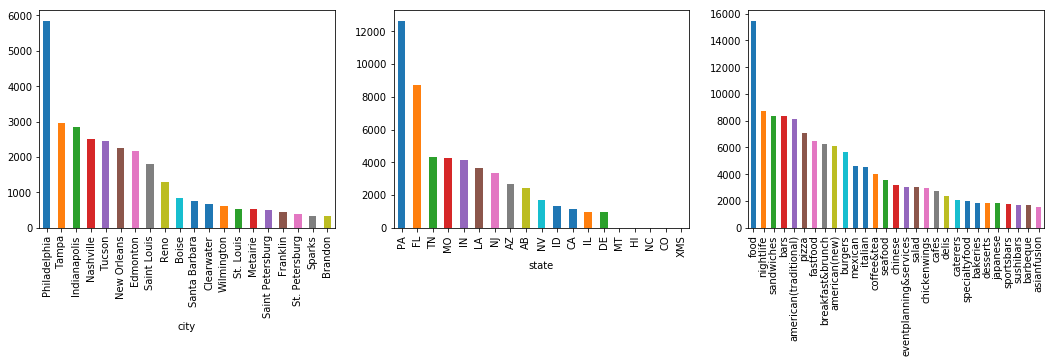

In [9]:
# Some interesting plot to know the data

fig = plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
df_bus_count1 = df_business.groupby('city').count()
df_bus_city = df_bus_count1['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:20].plot(kind = 'bar')

plt.subplot(1, 3, 2)
df_bus_count2 = df_business.groupby('state').count()
df_bus_state = df_bus_count2['name']
df_bus_state_sorted = df_bus_state.sort_values(ascending = False)
df_bus_state_sorted[:20].plot(kind = 'bar')

plt.subplot(1, 3, 3)
uniq_cat_dict = {}
for i in df_business.categories:
    cat = str(i).replace(" ", "").split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[1:30].plot(kind = 'bar')


_ = plt.plot

In [10]:
# Printing the categories
uniq_cat_series

restaurants                  52268
food                         15472
nightlife                     8723
sandwiches                    8366
bars                          8337
american(traditional)         8139
pizza                         7093
fastfood                      6472
breakfast&brunch              6239
american(new)                 6097
burgers                       5636
mexican                       4600
italian                       4573
coffee&tea                    4053
seafood                       3539
chinese                       3169
eventplanning&services        3068
salad                         3064
chickenwings                  2966
cafes                         2756
delis                         2393
caterers                      2059
specialtyfood                 2011
bakeries                      1889
desserts                      1838
japanese                      1830
sportsbars                    1797
sushibars                     1717
barbeque            

## Now we want to encode the field called categories

In [11]:
mlb = MultiLabelBinarizer()

#create boolean mask matched non NaNs values
mask = df_business['categories'].notnull()

#filter by boolean indexing
arr = mlb.fit_transform(df_business.loc[mask, 'categories'].dropna().str.strip('[]').str.split(','))

#create DataFrame and add missing (NaN)s index values
df_categories = (pd.DataFrame(arr, index=df_business.index[mask], columns=mlb.classes_)
               .reindex(df_business.index, fill_value=0))

df_categories.sort_index().head(10)

,acaibowls,accessories,accountants,activelife,acupuncture,adult,adulteducation,adultentertainment,advertising,afghan,...,winebars,wineries,winetastingclasses,winetastingroom,winetours,women'sclothing,wraps,yelpevents,yoga,zoos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### Preprocessing the cities: 
After the preprocessing, the number of unique cities dropped. 

In [12]:
df_business = df_business.sort_values(by=['city'])  # Sorting by name
print('Original unique city values:', len(df_business['city'].unique()))  # Printing the unique values
df_business['city'] = df_business['city'].str.lower()
print('Unique city values after changing all letter to lowercase:', len(df_business['city'].unique())) # Printing the unique values

Original unique city values: 920
Unique city values after changing all letter to lowercase: 859


### Encoding the city and state

In [13]:
# Encoding feature City and State features
df_city = pd.get_dummies(df_business.city).sort_index()
df_state = pd.get_dummies(df_business.state).sort_index()
df_city.head(10) # printing for state (example)

,abington,abington township,affton,aldan,algiers,alloway,alton,ambler,antioch,apollo beach,...,wycombe,wyncote,wyndlake condominium,wyndmoor,wynnewood,yardley,yeadon,zephyrhills,zieglerville,zionsville
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Sorting by index for better visualization
df_restData = df_business[['business_id', 'latitude','longitude','stars','is_open']].sort_index()

In [15]:
# Creating the item profile with all pre-processed enconded item features
frames = [df_restData, df_categories, df_city, df_state]
df_itemProf = pd.concat(frames, axis=1)
df_itemProf.sort_index().head(10)

,business_id,latitude,longitude,stars,is_open,acaibowls,accessories,accountants,activelife,acupuncture,...,IN,LA,MO,MT,NC,NJ,NV,PA,TN,XMS
3,MTSW4McQd7CbVtyjqoe9mw,39.955505,-75.155564,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,CF33F8-E6oudUQ46HnavjQ,36.269593,-87.058943,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,k0hlBqXX-Bt0vf1op7Jr1w,38.565165,-90.321087,3.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,bBDDEgkFA1Otx9Lfe7BZUQ,36.208102,-86.768170,1.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,eEOYSgkmpB90uNA7lDOMRA,27.955269,-82.456320,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,il_Ro8jwPlHresjw9EGmBg,39.637133,-86.127217,2.5,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14,0bPLkL0QhhPO5kt1_EXmNQ,27.916116,-82.760461,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,39.953949,-75.143226,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,ROeacJQwBeh05Rqg7F6TCg,39.943223,-75.162568,4.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,WKMJwqnfZKsAae75RMP6jA,53.546045,-113.499169,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Apply normalization technique to Column 1 and Column 2
df_itemProf_normalized = df_itemProf.copy()
df_itemProf_normalized['latitude'] = (df_itemProf['latitude'] - df_itemProf['latitude'].mean()) / df_itemProf['latitude'].std()    
df_itemProf_normalized['longitude'] = (df_itemProf['longitude'] - df_itemProf['longitude'].mean()) / df_itemProf['longitude'].std()      
# View normalized data  
df_itemProf_normalized.sort_index().head(10)

,business_id,latitude,longitude,stars,is_open,acaibowls,accessories,accountants,activelife,acupuncture,...,IN,LA,MO,MT,NC,NJ,NV,PA,TN,XMS
3,MTSW4McQd7CbVtyjqoe9mw,0.492047,0.918595,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,CF33F8-E6oudUQ46HnavjQ,-0.121110,0.056730,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,k0hlBqXX-Bt0vf1op7Jr1w,0.260762,-0.179465,3.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,bBDDEgkFA1Otx9Lfe7BZUQ,-0.131339,0.077784,1.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,eEOYSgkmpB90uNA7lDOMRA,-1.504208,0.389983,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,il_Ro8jwPlHresjw9EGmBg,0.439085,0.124192,2.5,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
14,0bPLkL0QhhPO5kt1_EXmNQ,-1.510721,0.367962,4.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,MUTTqe8uqyMdBl186RmNeA,0.491788,0.919488,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,ROeacJQwBeh05Rqg7F6TCg,0.490003,0.918087,4.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,WKMJwqnfZKsAae75RMP6jA,2.752850,-1.857675,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_itemProf_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52268 entries, 3 to 150340
Columns: 1610 entries, latitude to XMS
dtypes: float64(3), int32(728), int64(1), uint8(878)
memory usage: 190.9 MB


# Loading the user dataset
The second dataset regards the Users' information

In [17]:
# Loading the user file
path = 'data/yelp_academic_dataset_user.json'
df_user = spark.read.json(path)

In [18]:
# Print the number of rows and columns
print((df_user.count(), len(df_user.columns)))

(1987897, 22)


In [19]:
# Printing the columns
df_user.columns

['average_stars',
 'compliment_cool',
 'compliment_cute',
 'compliment_funny',
 'compliment_hot',
 'compliment_list',
 'compliment_more',
 'compliment_note',
 'compliment_photos',
 'compliment_plain',
 'compliment_profile',
 'compliment_writer',
 'cool',
 'elite',
 'fans',
 'friends',
 'funny',
 'name',
 'review_count',
 'useful',
 'user_id',
 'yelping_since']

In [20]:
# Selecting the categores of interest
df_user_filtered = df_user.select('user_id', 'review_count')

In [21]:
# Printing how many Null files each categorie have
for i in df_user_filtered.columns:
    print(i, df_user_filtered.filter(col(i).isNull()).count())

user_id 0
review_count 0


In [22]:
df_user_filtered.show(10)

+--------------------+------------+
|             user_id|review_count|
+--------------------+------------+
|qVc8ODYU5SZjKXVBg...|         585|
|j14WgRoU_-2ZE1aw1...|        4333|
|2WnXYQFK0hXEoTxPt...|         665|
|SZDeASXq7o05mMNLs...|         224|
|hA5lMy-EnncsH4JoR...|          79|
|q_QQ5kBBwlCcbL1s4...|        1221|
|cxuxXkcihfCbqt5By...|          12|
|E9kcWJdJUHuTKfQur...|         358|
|lO1iq-f75hnPNZkTy...|          40|
|AUi8MPWJ0mLkMfwbu...|         109|
+--------------------+------------+
only showing top 10 rows



In [23]:
# Removing users with less than 10 reviews
df_user_filtered = df_user_filtered.filter(col('review_count')>=10)

In [24]:
# Printing the number of users with more than 10 reviews
df_user_filtered.count()

726519

# Loading the 'review' dataset
The third dataset regards the Review' information

In [128]:
# Loading the review file
path = 'data/yelp_academic_dataset_review.json'
df_review = spark.read.json(path)

In [129]:
# Print the number of rows and columns
print((df_review.count(), len(df_review.columns)))

(6990280, 9)


In [130]:
#Printing the columns' name
df_review.columns

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [131]:
df_review1 = df_review[['business_id','user_id','stars']]
df_review1.show(10)

+--------------------+--------------------+-----+
|         business_id|             user_id|stars|
+--------------------+--------------------+-----+
|XQfwVwDr-v0ZS3_Cb...|mh_-eMZ6K5RLWhZyI...|  3.0|
|7ATYjTIgM3jUlt4UM...|OyoGAe7OKpv6SyGZT...|  5.0|
|YjUWPpI6HXG530lwP...|8g_iMtfSiwikVnbP2...|  3.0|
|kxX2SOes4o-D3ZQBk...|_7bHUi9Uuf5__HHc_...|  5.0|
|e4Vwtrqf-wpJfwesg...|bcjbaE6dDog4jkNY9...|  4.0|
|04UD14gamNjLY0IDY...|eUta8W_HdHMXPzLBB...|  1.0|
|gmjsEdUsKpj9Xxu6p...|r3zeYsv1XFBRA4dJp...|  5.0|
|LHSTtnW3YHCeUkRDG...|yfFzsLmaWF2d4Sr0U...|  5.0|
|B5XSoSG3SfvQGtKEG...|wSTuiTk-sKNdcFypr...|  3.0|
|gebiRewfieSdtt17P...|59MxRhNVhU9MYndMk...|  3.0|
+--------------------+--------------------+-----+
only showing top 10 rows



In [132]:
# Printing how many Null files each categorie have
for i in df_review1.columns:
    print(i, df_review1.filter(col(i).isNull()).count())

business_id 0
user_id 0
stars 0


In [134]:
# Filtering REVIEWS by only users identified with >= 10 REVIEWS
df_review2 = df_review1.join(df_user_filtered, df_review1.user_id == df_user_filtered.user_id ,"left_semi")
df_review2.count()

4863844

In [139]:
# Filtering REVIEWS file by only RESTAURANTS identified with the RESTAURANT categorie
df_review3 = df_review2.join(df_business_filtered[['business_id']], df_review2.business_id == df_business_filtered.business_id ,"left_semi")
df_review3.count()

3432479

In [141]:
# Removing duplicated review (if the user evaluated the SAME business muliples times)
df_review3.show(10)

+--------------------+--------------------+-----+
|         business_id|             user_id|stars|
+--------------------+--------------------+-----+
|h-lRhCfPhnVTkcndG...|--0DrQkM0FT-yCQRW...|  1.0|
|GBTPC53ZrG1ZBY3DT...|--1orhUoGFSdHXsox...|  1.0|
|VaO-VW3e1kARkU9bP...|--1orhUoGFSdHXsox...|  5.0|
|BD1FU6xsYPtbQZ8pX...|--3Hl2oAvTPlq-f7K...|  2.0|
|hodLyDkWXAosXLSTK...|--3Hl2oAvTPlq-f7K...|  5.0|
|EtKSTHV5Qx_Q7Aur9...|--4AjktZiHowEIBCM...|  4.0|
|wUnLSg_GKfEIQ5CQQ...|--4AjktZiHowEIBCM...|  4.0|
|LNHq9WxfhN2UBNOR2...|--4AjktZiHowEIBCM...|  5.0|
|wm5mQ4cSpvko9WlCq...|--4AjktZiHowEIBCM...|  5.0|
|tYn8hGpZiRgJ8cP2F...|--4AjktZiHowEIBCM...|  4.0|
+--------------------+--------------------+-----+
only showing top 10 rows



# Content Based Recommendation System
Here we implement the Content Based Recommendation system

In [33]:
df_itemProf_normalized = df_itemProf_normalized.drop('business_id', axis = 1) # dropping business ID from item profile df

In [34]:
np_items_matrix = np.array(df_itemProf_normalized) # Converting the item profile df to np_array (to multiply)

In [35]:
np.shape(np_items_matrix)

(52268, 1610)

In [37]:
# !!!!!!!!!!!!! MODIFY THIS PART LATER !!!!  Reloading because .join function does not work if we use with PANDAS and with PYPARK
# Loading the business.json in spark 
path = 'data/yelp_academic_dataset_business.json'
df_business = spark.read.json(path)
df_business_filtered = df_business.filter(df_business.categories.contains('Restaurants'))

In [153]:
# Creating a function to discovery STARS GIVEN BY A USER FOR ALL RESTAURANTS
def return_stars(user_id):
    df_temp = df_review3.filter(col('user_id') == user_id)  # Filtering REVIEWS based on specific USER
    df_temp1 = df_business_filtered[['business_id','city']].join(df_temp, ['business_id'], how="full_outer")  # Creating the list of 'REVIEW' of current USER (note that business not evaluated receives None)
    np_stars = np.array(df_temp1.select('stars').collect())  # Creating a list of reviews
    np_stars = np_stars.astype(str)  # Converting to string to remove 'None'
    np_stars[np_stars == 'None'] = 0  # Replacing 'None' per 0
    np_stars = np_stars.astype(float)  # Converting to float
    return(np_stars)

In [178]:
# Putting all user_id in a single list to be used later
user_list = [row[0] for row in df_user_filtered.select('user_id').collect()]

In [304]:
# Creating restaurant list and categories to be printed
restaurant_list = [row[0] for row in df_business_filtered.select('name').collect()]
categories_list = [row[0] for row in df_business_filtered.select('categories').collect()]

In [326]:
# CREATING THE USERS PROFILE
user_number = 100
user_profile = (np.matmul(return_stars(user_list[user_number]).transpose(),np_items_matrix))

In [327]:
# Running cosine similarity on user profile for a given user and all items profiles
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(user_profile[[0]], np_items_matrix[:])

In [332]:
# Returning the position of the 5 highest similarities found for a given user
n_high = 5 # Setting the number of recommendations
indexes = np.argpartition(list(similarity[0]), -n_high)[-n_high:]

In [339]:
print('For user "%s" we recommend the following restaurants:\n' %(user_list[user_number]))
for i in range(len(indexes)):
    print('Recomendation #%i is: \nName:%s \nCategory:%s \n' %(i+1, restaurant_list[i], categories_list[i]))

For user "j14WgRoU_-2ZE1aw1dXrJg" we recommend the following restaurants:

Recomendation #1 is: 
Name:St Honore Pastries 
Category:Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries 

Recomendation #2 is: 
Name:Sonic Drive-In 
Category:Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants 

Recomendation #3 is: 
Name:Tsevi's Pub And Grill 
Category:Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek 

Recomendation #4 is: 
Name:Sonic Drive-In 
Category:Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food 

Recomendation #5 is: 
Name:Vietnamese Food Truck 
Category:Vietnamese, Food, Restaurants, Food Trucks 

